# * Kurapati Venkatesh

# * 09012021

# * Topic: Forecasting – Decision Tree And Random Forest  ✨🎄

# ---------------------------------------------------------------------------

## Problem Statement:

## In Recruitment domain, HR faces with the challenge of predicting if the candidate is faking his salary or the candidate is genuine. In order to do it manually, let us use our Machine Learning algorithm to correctly classify using Decision Tree and Random Forest. We have a scenario where, a candidate claims to have 5 years of experience and earning 70000 per month working as regional manager and the candidate is expecting more than his previous CTC. A sample data has been collected, find out the candidate claims are genuine or fake.

## -----------------------------------------------------------------------------------

### Problem Objective:
##### To correctly classify using Decision Tree and Random Forest - find out the candidate claims are genuine or fake.

## -------------------------------------------------------------------------------------------

## import libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## import dataset:

In [14]:
dataset=pd.read_csv(r"G:\360digit\assignments meterial\Decision tree\HR_DT.csv")

In [15]:
df = dataset

Suppose we want to predict the salary for a new employee whose level of experience is 5 and he said that the previous company paid him 70000 and he wants a higher salary and we have got some data which has three columns- Position,Level and salary. then here we will use decision tree to predict his salary based on the data we have.

By this approach we can predict whether he/she telling the truth or bluffing.

In [5]:
dataset.info

<bound method DataFrame.info of     Position of the employee  no of Years of Experience of employee  \
0           Business Analyst                                    1.1   
1          Junior Consultant                                    1.3   
2          Senior Consultant                                    1.5   
3                    Manager                                    2.0   
4            Country Manager                                    2.2   
..                       ...                                    ...   
191           Region Manager                                    3.9   
192                  Partner                                    4.0   
193           Senior Partner                                    4.0   
194                  C-level                                    4.1   
195                      CEO                                    4.5   

      monthly income of employee  
0                          39343  
1                          46205  
2         

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Position of the employee               196 non-null    object 
 1   no of Years of Experience of employee  196 non-null    float64
 2    monthly income of employee            196 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.7+ KB


now we divide our dataset into X and y, where X is the independent variable and y is the dependent variable.

In [7]:
X=dataset.iloc[:,1:2].values
y=dataset.iloc[:,2].values

## fitting the decision tree regression model to the dataset:

In [8]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

we are training the entire dataset here and we will test it on any random value. Suppose the new employee said he has a experience of 5 years so we will predict his salary based on that.

In [9]:
y_pred = regressor.predict([[5]])

Now let's check what is the predicted salary for the new employee.

In [10]:
y_pred

array([67938.])

It returns 67938 which is a little less than the salary that the employee told us

### Now visualising the results:

In [11]:
#visualising the decision tree regression result(for higher resolution and smoother curves)
X_grid=np.arange(min(X),max(X),0.01)
X_grid.shape

(950,)

In [12]:
#reshaping X_grid from 1-D array to 2-D array
X_grid=X_grid.reshape(len(X_grid),1)

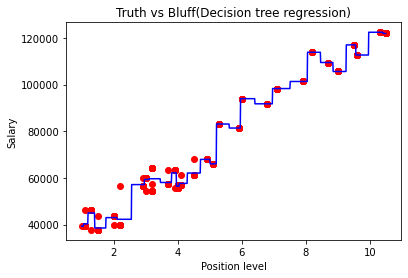

In [13]:
plt.scatter(X,y,color='red')
plt.plot(X_grid,regressor.predict(X_grid),color='blue')
plt.title('Truth vs Bluff(Decision tree regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

So, we can conclude that the prediction is not accurate but close to the real value.


To overcome this accuracy issue we have another algorithm called Random forest.Random forest is an ensemble learning algorithm, which uses multiple algorithms together to get the result.

Random forest uses many decision trees so, it makes our predictions more accurate.

# Random Forest:

In [17]:
df.head()

,Position of the employee,no of Years of Experience of employee,monthly income of employee
0,Business Analyst,1.1,39343
1,Junior Consultant,1.3,46205
2,Senior Consultant,1.5,37731
3,Manager,2.0,43525
4,Country Manager,2.2,39891


In [18]:
X =df.iloc[:, 1:2].values
y =df.iloc[:, 2].values

As the dataset is very small we won’t perform any splitting. We will proceed directly to fitting the data.

In [19]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 10, random_state = 0)
model.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

Did you notice that we have made just 10 trees by putting n_estimators=10? It is up to us to play around with the number of trees. As it is a small dataset, 10 trees are enough.

Now we will predict the salary of a person who has an experience of 5 years

In [21]:
y_pred =model.predict([[5]])

In [22]:
y_pred 

array([67938.])

The prediction is same as the decision tree.

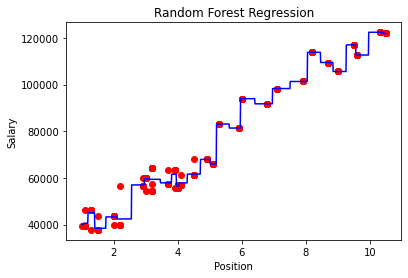

In [25]:
X_grid_data = np.arange(min(X), max(X), 0.01)
X_grid_data = X_grid.reshape((len(X_grid_data), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid_data,model.predict(X_grid_data), color = 'blue')
plt.title('Random Forest Regression')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()